### 3. Data Preprocessing

**Steps for Text pre processing**

- Remove special chars and letters with those special chars
- Numbers and numbers with letters
- remove names
- not include links like start with http
- Not include words with :, to:, id:, pass:
- remove anything in brackets (){}[]
- remove comma's?(,) i think yes.
- For Forwarded Emails:- 
 - starts with -----
 - Return-Path: is last line
 - so removing it

In [98]:
import os
import email # to process email more effectively and easily
from prettytable import PrettyTable
from tqdm import tqdm
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re #regex
from tqdm import tqdm

In [99]:
EmailData = pd.read_pickle('EmailData_AfterEDA.pkl')
EmailData.head()

,EmailText,Subject,Day,Hour_periods,Seasons
0,Message-ID: <7452188.1075855667684.JavaMail.ev...,Consolidated positions: Issues & To Do list,Mon,Morning,Autumn
1,Message-ID: <23790115.1075855667708.JavaMail.e...,Consolidated positions: Issues & To Do list,Mon,Morning,Autumn
3,Message-ID: <14670081.1075855667751.JavaMail.e...,Re: 2001 Margin Plan,Thu,Morning,Autumn
4,Message-ID: <2101427.1075855667773.JavaMail.ev...,"Var, Reporting and Resources Meeting",Wed,Morning,Autumn
5,Message-ID: <19431120.1075855667795.JavaMail.e...,Westgate,Tue,Morning,Autumn


In [100]:
print("Dataset Contains {r} Rows and {c} Columns".format(r=EmailData.shape[0],c=EmailData.shape[1]))

Dataset Contains 498207 Rows and 5 Columns


In [101]:
#Example of Raw Email
print(EmailData['EmailText'].iloc[0])

Message-ID: <7452188.1075855667684.JavaMail.evans@thyme>
Date: Mon, 9 Oct 2000 07:16:00 -0700 (PDT)
From: phillip.allen@enron.com
To: keith.holst@enron.com
Subject: Consolidated positions: Issues & To Do list
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Keith Holst
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\All documents
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 10/09/2000 
02:16 PM ---------------------------


Richard Burchfield
10/06/2000 06:59 AM
To: Phillip K Allen/HOU/ECT@ECT
cc: Beth Perlman/HOU/ECT@ECT 
Subject: Consolidated positions: Issues & To Do list

Phillip,
 Below is the issues & to do list as we go forward with documenting the 
requirements for consolidated physical/financial positions and transport 
trade capture. What we need to focus on is the first bullet in Allan's list; 
the need for a single set of requir

#### Creating new column and saving Email body in it

In [102]:
#https://www.kaggle.com/code/zichen/explore-enron/notebook
# Helper functions
# get_payload() extracts Email body
def getEmailTxt(message):
    '''To get the content from email objects'''
    parts = []
    for part in message.walk():
        #getting text/plain data
        if part.get_content_type() == 'text/plain':
            parts.append(part.get_payload())
    return ''.join(parts)

In [103]:
# Parse the emails into a list email objects
messages = list(map(email.message_from_string, EmailData['EmailText']))
EmailData['content'] = list(map(getEmailTxt,messages))
del EmailData['EmailText']
#deleting 'Day','Hour_periods','Seasons' as we'll be using only subject and Emails for Prediction
EmailData.drop(['Day','Hour_periods','Seasons'],axis=1,inplace=True)
del messages
EmailData.head()
EmailData.head()

,Subject,content
0,Consolidated positions: Issues & To Do list,---------------------- Forwarded by Phillip K ...
1,Consolidated positions: Issues & To Do list,---------------------- Forwarded by Phillip K ...
3,Re: 2001 Margin Plan,"Paula,\n\n 35 million is fine\n\nPhillip"
4,"Var, Reporting and Resources Meeting",---------------------- Forwarded by Phillip K ...
5,Westgate,---------------------- Forwarded by Phillip K ...


In [104]:
print(EmailData['content'].iloc[0])

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 10/09/2000 
02:16 PM ---------------------------


Richard Burchfield
10/06/2000 06:59 AM
To: Phillip K Allen/HOU/ECT@ECT
cc: Beth Perlman/HOU/ECT@ECT 
Subject: Consolidated positions: Issues & To Do list

Phillip,
 Below is the issues & to do list as we go forward with documenting the 
requirements for consolidated physical/financial positions and transport 
trade capture. What we need to focus on is the first bullet in Allan's list; 
the need for a single set of requirements. Although the meeting with Keith, 
on Wednesday,  was informative the solution of creating a infinitely dynamic 
consolidated position screen, will be extremely difficult and time 
consuming.  Throughout the meeting on Wednesday, Keith alluded to the 
inability to get consensus amongst the traders on the presentation of the 
consolidated position, so the solution was to make it so that a trader can 
arrange the position screen to their liking (much li

### Removing Unwanted Mails
- After goin through some of the emails, Some emails are spam, some are repetative, etc
- So removing them would increase quality recommendation

In [105]:
#Example of Unnecessary Emails For our Task
a = EmailData[EmailData['content'].str.contains('Trade Counts and Volume')]
print(len(a))
print('--'*10,'content','--'*10,'\n',a['content'].iloc[19])

46
-------------------- content -------------------- 
 

EnronOnline
Trade Counts and Volume for May 14, 2001 
			EXTERNAL		INTERNAL		TOTAL			
COUNTRY	COMMODITY	CATEGORY	COUNT	QTY	COUNT	QTY	COUNT	QTY	UNIT OF MEASURE	
Austria	Power	Physical	        13 	           10,300 	        -   	                   -   	        13 	           10,300 	MWh	
Belgium	Natural Gas	Physical	        10 	      1,065,000 	        -   	                   -   	        10 	      1,065,000 	MMBtu	
Canada	Natural Gas	Financial	          7 	      3,655,000 	          1 	         155,000 	          8 	      3,810,000 	MMBtu	
Canada	Natural Gas	Physical	      235 	    14,076,271 	        -   	                   -   	      235 	    14,076,271 	MMBtu	
Canada	Power	Financial	        18 	           20,642 	        -   	                   -   	        18 	           20,642 	MWh (Canada)	
France	Power	Physical	          1 	             4,741 	        -   	                   -   	          1 	             4,741 	MWh	
German

In [106]:
#Removing Sponsored Mails
EmailData = EmailData[~EmailData['content'].str.contains('Sponsored by')]
#Removing Outlook Migration Team@ENRON Mails
EmailData = EmailData[~EmailData['content'].str.contains('Outlook Migration Team@ENRON')]
#Removing NEWS ANALYSIS Mails
EmailData = EmailData[~EmailData['content'].str.contains('NEWS ANALYSIS')]
#Removing Trade Counts and Volume Mails 
EmailData = EmailData[~EmailData['content'].str.contains('Trade Counts and Volume')]
EmailData.shape

(497395, 2)

### Storing Previous Emails in New Columns
#### Observation,
- In the given dataset, we have 2 types of mail, Forwarded by and Forwarded by with Original Message.
- If 'Forwarded by' is in the mails multiple times then mail contains multiple email bodies.
- If mail contains Original Message then it also has previous emails.

#### Action,
- We'll Store Latest Email in Current Email Column
- And For Previous Emails, We'll create a reverse list, concatenate and save them in PreviousMails column

In [107]:
def returnMsgBody(ttxt): 
    '''
    This Method returns body of the Email
    '''
    ttxt = email.message_from_string(ttxt)

    # Extract the body of the email
    ttxt = ttxt.get_payload()

    # return the body of the email
    return ttxt

In [108]:
#Creating List to store Emails
message = [i for i in EmailData['content'].values]

#Creating New Columns
EmailData['CurrentMail'] = ''
EmailData['PreviousMails'] = ''

def sortMails(EmailList):
    '''
    This method splits the mails into Previous and Current Mails
    '''
    Previous = ['' for i in range(len(EmailList))]
    Current = ['' for i in range(len(EmailList))]
    for indd,msg in enumerate(tqdm(EmailList)):
        CurrentFlag = True
        if '- Forwarded by' in msg:
            txxt = msg.split('- Forwarded by')
            CheckCurr = txxt[0].replace('-','')
            if not CheckCurr.strip():
                txxt = txxt[1:]
            
            for ind,mails in enumerate(txxt):
                if 'Original Message' in mails and 'Original Message Excluded:' not in mails:
                    newmail=[]
                    newmail = mails.split('Original Message')
                    for ind2,preMsg in enumerate(newmail):
                        if 'From:' in preMsg:
                            index = preMsg.index('From:')
                            preMsg = preMsg[index:]
                            newmail[ind2] = returnMsgBody(preMsg)
                        elif 'To:' in preMsg:
                            index = preMsg.index('To:')
                            preMsg = preMsg[index:]
                            newmail[ind2] = returnMsgBody(preMsg)
                    
                    if CurrentFlag:
                        Current[indd] = newmail[0]
                        CurrentFlag = False 
                        newmail = newmail[1:]
                        
                    #reversing the list so that we get previous message as first
                    newmail = newmail[::-1]
                    txxt[ind] = '.'.join(newmail)
                    
                elif 'To:' in mails or 'From:' in mails:
                    if 'To:' in mails:
                        index = mails.index('To:')
                        mails = mails[index:]
                    elif 'From:' in mails:
                        index = mails.index('From:')
                        mails = mails[index:]
                        
                    txxt[ind] = returnMsgBody(mails)
                                                          
                    if CurrentFlag:
                        Current[indd] = txxt[ind]
                        CurrentFlag = False
                        txxt[ind] = ''
                                                          
                else:
                    if CurrentFlag:
                        Current[indd] = mails
                        CurrentFlag = False 
                                                          
            #reversing the list so that we get previous message as first
                                                          
            txxt = txxt[::-1]
            Previous[indd] = '.'.join(txxt)
                    
        elif 'Original Message' in msg :
            newmail=[]
            newmail = msg.split('Original Message')
            for ind2,preMsg in enumerate(newmail):
                if 'From:' in preMsg:
                    index = preMsg.index('From:')
                    preMsg = preMsg[index:]
                    newmail[ind2] = returnMsgBody(preMsg)
                elif 'To:' in preMsg:
                    index = preMsg.index('To:')
                    preMsg = preMsg[index:]
                    newmail[ind2] = returnMsgBody(preMsg)
                                                          
            if CurrentFlag:
                Current[indd] = newmail[0]
                CurrentFlag = False
                    
            #reversing the list so that we get previous message as first
            newmail = newmail[1:]                                  
            newmail = newmail[::-1]
                                                          
            Previous[indd]= '.'.join(newmail)
                                                          
        else:
            Current[indd] = msg
            Previous[indd] = ''
        
    return Current,Previous
                    
   

In [109]:
EmailData['CurrentMail'],EmailData['PreviousMails'] = sortMails(message)
EmailData.head()

100%|███████████████████████████████████████████████████████████████████████| 497395/497395 [00:18<00:00, 26927.53it/s]


,Subject,content,CurrentMail,PreviousMails
0,Consolidated positions: Issues & To Do list,---------------------- Forwarded by Phillip K ...,"Phillip,\n Below is the issues & to do list as...","Mills/HOU/ECT@ECT, Kenny Ha/HOU/ECT@ECT \nSubj..."
1,Consolidated positions: Issues & To Do list,---------------------- Forwarded by Phillip K ...,"Phillip,\n Below is the issues & to do list as...","Mills/HOU/ECT@ECT, Kenny Ha/HOU/ECT@ECT \nSubj..."
3,Re: 2001 Margin Plan,"Paula,\n\n 35 million is fine\n\nPhillip","Paula,\n\n 35 million is fine\n\nPhillip",
4,"Var, Reporting and Resources Meeting",---------------------- Forwarded by Phillip K ...,"Neal/HOU/ECT@ECT, John Arnold/HOU/ECT@ECT, Gra...",
5,Westgate,---------------------- Forwarded by Phillip K ...,\nWestgate\n\nEnclosed are demographics on the...,


In [110]:
#Example of Current and previous Mails
a = EmailData[EmailData['content'].str.contains('- Forwarded by') | EmailData['content'].str.contains('Original Message')]
print(len(a))
print('--'*10,'content','--'*10,'\n',a['content'].iloc[19])
print('--'*10,'CurrentMail','--'*10,'\n',a['CurrentMail'].iloc[19])
print('--'*10,'PreviousMails','--'*10,'\n',a['PreviousMails'].iloc[19])

170546
-------------------- content -------------------- 
 ---------------------- Forwarded by Phillip K Allen/HOU/ECT on 09/05/2000 
01:50 PM ---------------------------


"Christi Smith" <christi.smith@lrinet.com> on 09/05/2000 11:40:59 AM
Please respond to <christi.smith@lrinet.com>
To: <Phillip.K.Allen@enron.com>
cc: "Debbie Nowak (E-mail)" <dnowak@enron.com> 
Subject: RE: Receipt of Team Selection Form - Executive Impact & Influence 
Program


We have not received your completed Team Selection information.  It is
imperative that we receive your team's information (email, phone number,
office) asap.  We cannot start your administration without this information,
and your raters will have less time to provide feedback for you.

Thank you for your assistance.

Christi

-----Original Message-----
From: Christi Smith [mailto:christi.smith@lrinet.com]
Sent: Thursday, August 31, 2000 10:33 AM
To: 'Phillip.K.Allen@enron.com'
Cc: Debbie Nowak (E-mail); Deborah Evans (E-mail)
Subject: Receip

In [111]:
#Deleting Content Column as we dont ned it anymore
del EmailData['content']

In [112]:
#DataFrame Level Preprocessing
def removent(df,feature):
    '''
    #Removing new line and tab tags
    '''
    df[feature] = df[feature].str.replace('\n',' ').str.replace('\t','')
    #Also replace & with and
    df[feature] = df[feature].str.replace(',',' ')
    
    #Remove Remaining Email Tags
    df[feature] = df[feature].str.replace('Subject:',' ').str.replace('Consolidated positions:',' ').str.replace(',',' ')
    df[feature] = df[feature].str.replace('!',' ')
    
    return df[feature]

In [113]:
EmailData['CurrentMail'] = removent(EmailData,'CurrentMail')
EmailData['Subject'] = removent(EmailData,'Subject')
EmailData['PreviousMails'] = removent(EmailData,'PreviousMails')

In [114]:
# Preprocessing each Email
def Preproc(txtt):
    '''
    Replace Anything in brackets or other formats with empty sting 
    '''
    txtt = re.sub(r"-+ [^.]* -+", " ", txtt)
    txtt=re.sub(r"\(.*?\)"," ",txtt)
    txtt=re.sub(r"<.*?>"," ",txtt)
    txtt=re.sub(r"\[.*?\]"," ",txtt)
    
    return txtt

In [115]:
features = ['CurrentMail','Subject','PreviousMails']
for feats in tqdm(features):
    message = [i for i in EmailData[feats].values]
    for inss,mail in enumerate(message):
        if isinstance(mail,str):
            message[inss]=Preproc(mail)
    EmailData[feats] = message

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:15<00:00,  5.28s/it]


In [116]:
#Word Level
def specialCharCheck(text): 
    regex = re.compile("""[-+=*@_#`"$%^&*[\]\()<>/\|}{~:]""") 
    if(regex.search(text) == None): 
        return True     
    else:
        return False    
    
def numberCheck(text):
    return bool(re.search(r'\d', text)) 

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def onlyalphbets(phrase):
    #Delete other text than alphabets
    phrase = re.sub('[^A-Za-z]+', ' ', phrase)
    #Converting to lowercase
    return ' '.join(phrase.split()).strip().lower()

In [20]:
EmailData['CurrentMail'] = EmailData['CurrentMail'].str.replace(rp,'')
    EmailData['Subject'] = EmailData['Subject'].str.replace(rp,'')
    EmailData['PreviousMails']

IndentationError: unexpected indent (2889023296.py, line 2)

### For Basic model, We'll Merge Current  and Previous Emails

In [117]:
#Creating New DataFrame 
NewEmailData = pd.DataFrame()
NewEmailData['Email'] = EmailData['PreviousMails']+' . '+EmailData['CurrentMail']

In [118]:
message = NewEmailData['Email'].values
#To store all Sentences
sentences_list = []
for indd,msg in enumerate(message):
    if isinstance(msg,str) and len(msg)>1:
        msg = msg.strip()

        for sentence in msg.split('.'):
            #Removing Very Small and Very big sentences
            if len(sentence.split())>3 and len(sentence.split())<15:
                #Remove Sentence with Numbers
                if numberCheck(sentence)==False:
                    #Decontract the word
                    sentence = decontracted(sentence)
                    #Remove sentences with special characters
                    if specialCharCheck(sentence)==True:
                        sentences_list.append(sentence)


### List of Sentences After Processing

In [51]:
sentences_list[:5]

['We have had  three meetings which brought out very different issues from different  traders',
 '  It will help determine which requests fall under the project scope',
 ' Use the above to formulate a project plan',
 ' Customized rows and columns in the position manager  ',
 ' Position and PandL aggregation across all gas desks']

In [52]:
len(sentences_list)

1438948

In [54]:
#Saving list into DataFrame
sentences_df = pd.DataFrame({'Email Sentences': sentences_list})
sentences_df.head()

,Email Sentences
0,We have had three meetings which brought out ...
1,It will help determine which requests fall u...
2,Use the above to formulate a project plan
3,Customized rows and columns in the position m...
4,Position and PandL aggregation across all gas...


In [56]:
cnt = [len(mmsg.split()) for mmsg in sentences_df['Email Sentences'].values]
len(cnt)

1438948

In [58]:
#As Number of Words in sentence are 4 to 14
WordCnts = list(np.arange(4,15))
WordCnts

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [66]:
sentences_df['WordCnts'] = cnt
sentences_df.head()

,Email Sentences,WordCnts
0,We have had three meetings which brought out ...,14
1,It will help determine which requests fall u...,11
2,Use the above to formulate a project plan,8
3,Customized rows and columns in the position m...,8
4,Position and PandL aggregation across all gas...,8


<AxesSubplot: xlabel='WordCnts', ylabel='count'>

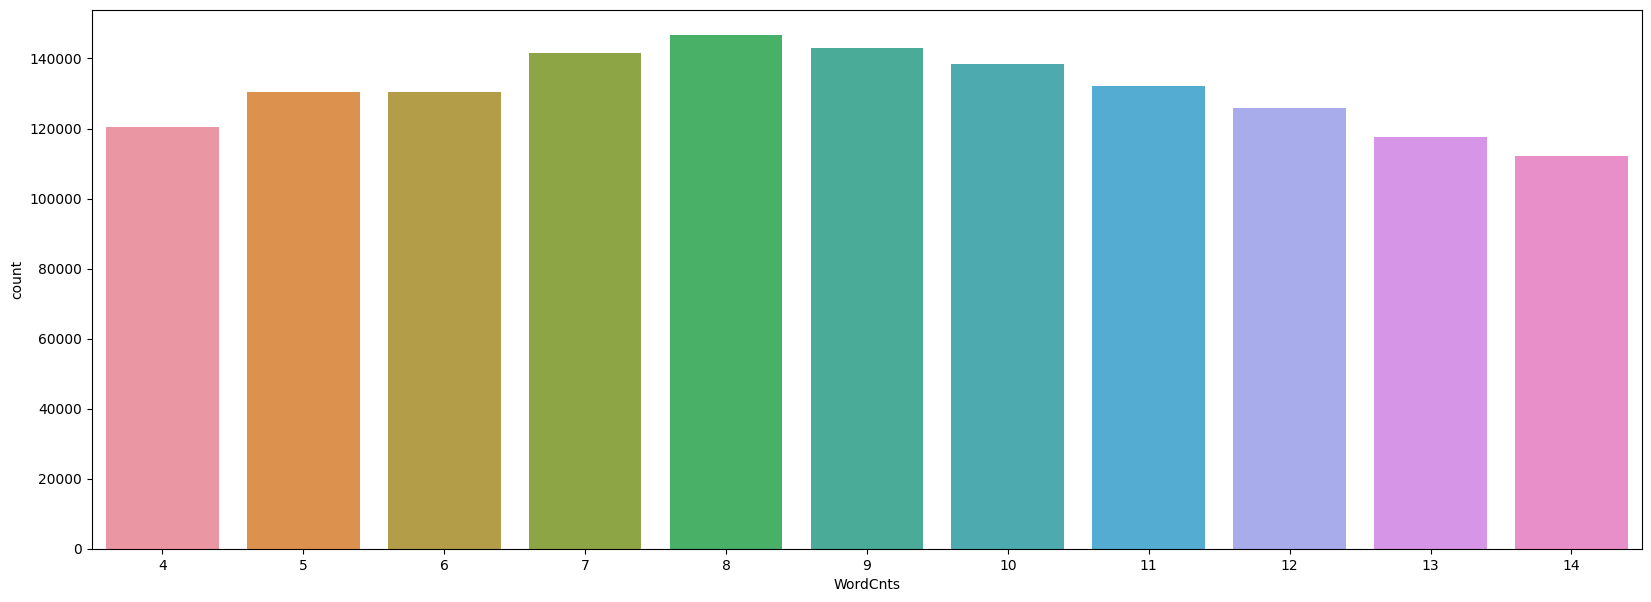

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(20, 7))
sns.countplot(x="WordCnts",data=sentences_df)

### Observation
- Number of Wrods in Each sentence is Very similar for all 

In [69]:
import tensorflow as tf

### Wrodcount Plot
- Some words are too often used so their wordcount is higher
- We want to make this system frequent use therefore we can drop rarely occuring words  
- Lets plot a plot of Number of times the Word occur in Sentences

In [71]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
tokenizer.fit_on_texts(sentences_df['Email Sentences'])
wordCnt = list(dict(tokenizer.word_counts).values())
wordCnt.sort(reverse=True)

(0.0, 150.0)

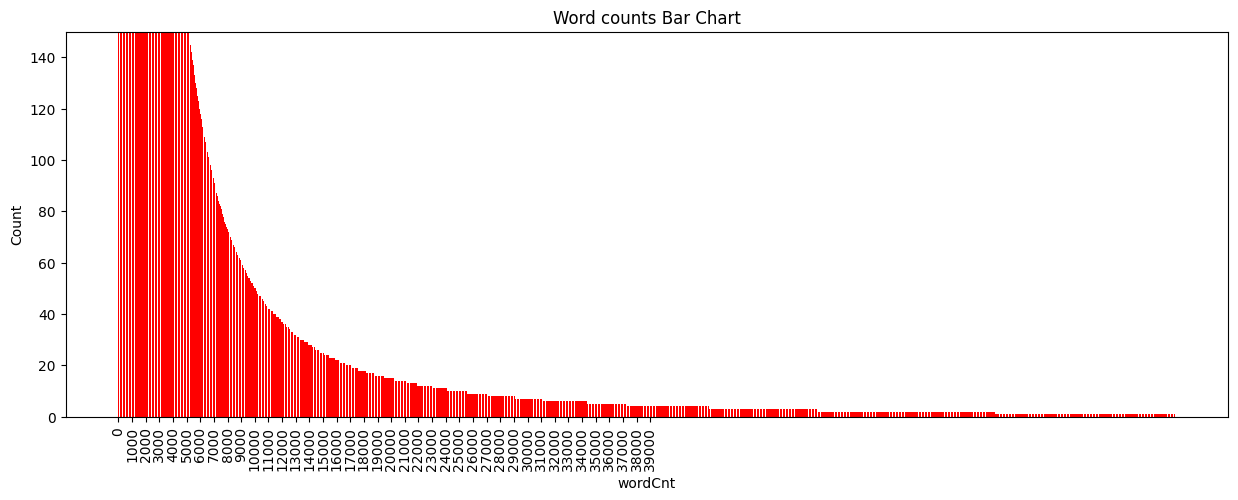

In [80]:
plt.figure(figsize=(15,5))
plt.bar(range(len(wordCnt)),wordCnt,align='center',color="red")
plt.xticks(range(0,40000,1000),rotation=90)
plt.ylim(0,150)
plt.xlabel('wordCnt')
plt.ylabel('Count')
plt.title('Word counts Bar Chart')

### OBSERVATIONS
- More than 5000 Word which occur more than 140 times
- We want our system to be more general purpose, So dropping more rarer Words
- Selecting sentences which contain these more frequent words

In [90]:
AllWords = {i:j for i,j in dict(tokenizer.word_counts).items() if j>140}

In [92]:
len(AllWords)

5403

In [94]:
#Selecting Only Sentences, Which Contain these words
NewSent = []
for i in tqdm(sentences_df['Email Sentences']):
    Check = True
    for j in AllWords.keys():
        wordds = i.split()
        for k in wordds:
            if k == j:
                NewSent.append(i)
                Check = False
                break
        if Check == False:
            break

100%|██████████████████████████████████████████████████████████████████████| 1438948/1438948 [04:31<00:00, 5308.50it/s]


In [95]:
print(len(NewSent))
NewSent[:10]

1372574


['We have had  three meetings which brought out very different issues from different  traders',
 '  It will help determine which requests fall under the project scope',
 ' Use the above to formulate a project plan',
 ' Customized rows and columns in the position manager  ',
 ' Position and PandL aggregation across all gas desks',
 '  Ability to handle volatility  skew and correlations',
 ' Ability to revalue all options incrementally throughout the trading day',
 '   Approximate delta changes between valuations using instantaneous gamma or a  gamma grid',
 ' Valuation of Gas Daily options',
 ' A new position screen for options  ']

In [96]:
#Saving File as .pkl
NewSentDF = pd.DataFrame({'Sentence':NewSent})
NewSentDF.head(2)

,Sentence
0,We have had three meetings which brought out ...
1,It will help determine which requests fall u...


In [97]:
NewSentDF.to_pickle('ProcessedEmailSentences.pkl')

In [3]:
import pandas as pd

In [9]:
#BUGFIX
#Removing sentences with ;
NewSentDF = pd.read_pickle('ProcessedEmailSentences.pkl')
NewSentDF.head(2)

,Sentence
0,we have had three meetings which brought out ...
1,it will help determine which requests fall un...


In [10]:
NewSentDF.shape

(313414, 1)

In [11]:
#BUGFIX
#This Bug was found during model training phase
#Found some unwanted values in the dataset, as input and output length should not be more than 14 combined
#But its showing 21 after tokenization so removing unwanted sentences from all datasets
#Removing Unwanted Sentences found during training

NewSentDF = NewSentDF[~NewSentDF['Sentence'].str.contains(';')]
NewSentDF.shape

(312065, 1)

In [12]:
NewSentDF.to_pickle('ProcessedEmailSentences.pkl')